# Progetto Big Data La Barbera - Drago

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, impute
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import csv
from scipy.stats import norm
from scipy import stats
from statistics import mode
from scipy.stats import skew

plt.style.use('ggplot')

print("### Librerie importate con successo ###")

### Librerie importate con successo ###


### Data Collection 

In [3]:
# importo il dataframe di training
df_train = pd.read_csv('docs/train.csv')

# importo il dataset di test
df_test = pd.read_csv('docs/test.csv')

# memorizzo un array con i nomi delle features 

features_train = df_train.columns
features_test = df_test.columns

diff = features_train.difference(features_test)[0]
print( diff)

# abbiamo confrontato i campi del test set e del training set 
# per accertarci che l'unica feature mancante in quello di test rispetto a quello di training fosse : "SalePrice"
#  ovvero ciò che dobbiamo predire 

df_train[diff].describe()



SalePrice


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Data Preprocessing

### Remove Duplicates

In [4]:
duplicates_cols = df_train.columns.difference(['Id'])

df_train.drop_duplicates(duplicates_cols)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Sales Histogram

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


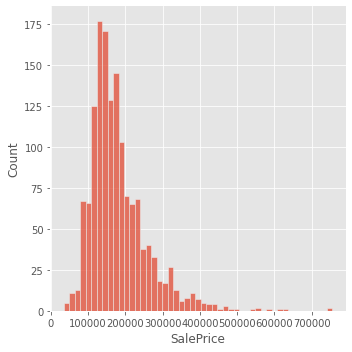

In [5]:
sns.displot(df_train['SalePrice'])
print(f"Skewness : {df_train['SalePrice'].skew()}")
print(f"Kurtosis : {df_train['SalePrice'].kurt()}")

### Categorical to Numerical Features 

In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# elimino i campi numerici dal dataset e rimango con le sole features categoriche 
categorical = df_train.select_dtypes(include='object')
categorical.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [8]:
values = {}
for c in categorical : 
  values[c]=list(df_train[c].unique())
values

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
 'Street': ['Pave', 'Grvl'],
 'Alley': [nan, 'Grvl', 'Pave'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['CollgCr',
  'Veenker',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'MeadowV',
  'Edwards',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'NPkVill',
  'Blmngtn',
  'BrDale',
  'SWISU',
  'Blueste'],
 'Condition1': ['Norm',
  'Feedr',
  'PosN',
  'Artery',
  'RRAe',
  'RRNn',
  'RRAn',
  'PosA',
  'RRNe'],
 'Condition2': ['Norm',
  'Artery',
  'RRNn',
  'Feedr',
  'PosN',
  'PosA',
  'RRAn',
  'RRAe'],
 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
 'HouseStyle': ['2Story',
  '1Story',
  '1.5Fin',
  '1.5Unf',
  

In [9]:

# coversione da categorica a numerica 
categorical_to_numerical = {
    'Street': {'Pave': 2, 'Grvl': 1},
    'Alley': {'Pave': 2, 'Grvl': 1}, 
    'LotShape': {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0},
    'LandContour': {'Lvl':3, 'Bnk':2, 'HLS':1, 'Low':0},
    'Utilities': {"AllPub": 4, "NoSewr": 3, "NoSeWa":2, "ELO": 1}, 
    'LandSlope': {"Gtl": 3, "Mod": 2, "Sev": 1},
    "ExterQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "ExterCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "BsmtQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "BsmtCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "BsmtExposure": {"Gd":4, "Av":3, "Mn":2, "No":1}, 
    "BsmtFinType1": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1}, 
    "BsmtFinType2": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1}, 
    "HeatingQC": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "CentralAir": {"Y":1, "N":0},
    "Electrical": {"SBrkr":5, "FuseA":4, "FuseF":3, "FuseP":2, "Mix":1}, 
    "KitchenQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "Functional": {"Typ":8, "Min1":7, "Min2":6, "Mod":5, "Maj1":4, "Maj2":3, "Sev":2, "Sal":1}, 
    "FireplaceQu": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "GarageFinish": {"Fin":3, "RFn":2, "Unf":1}, 
    "GarageQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "GarageCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "PavedDrive": {"Y":2, "P":1, "N":0},
    "PoolQC":  {"Ex":4, "Gd":3, "TA":2, "Fa":1}, 
}


new_num_columns = list(categorical_to_numerical.keys())
X = df_train.copy()
X[new_num_columns] = X[new_num_columns].fillna(0)
X1 = X.replace(categorical_to_numerical)


Y = df_test.copy()
Y[new_num_columns] = Y[new_num_columns].fillna(0)
Y1 = Y.replace(categorical_to_numerical)


In [10]:
new_categorical = X1.select_dtypes(include='object')
new_numerical= X1.select_dtypes(exclude='object')
columns_categorical = new_categorical.columns
columns_numerical= new_numerical.columns
print(columns_categorical, '--------->  ' f'tot : {columns_categorical.size}') # sono le feature che dopo la trasformazione son comunque rimaste di tipo categorico
print(columns_numerical, '--------->  ' f'tot : {columns_numerical.size}')

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object') --------->  tot : 19
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       '

####  Missing Values 

In [11]:
# se non si possiede installare la libreria jinja2  cmd : ' pip install jinja2 '
pd.concat([X1.isna().sum().rename('train'), Y1.isna().sum().rename('test')], axis=1)\
    .astype('float')\
        .sort_values(['train', 'test'], ascending = False)\
            .style.background_gradient(vmin=0, vmax=max([X1.shape[0], Y1.shape[0]]))

,train,test
MiscFeature,1406.000000,1408.000000
Fence,1179.000000,1169.000000
LotFrontage,259.000000,227.000000
GarageYrBlt,81.000000,78.000000
GarageType,81.000000,76.000000
MasVnrType,8.000000,16.000000
MasVnrArea,8.000000,15.000000
MSZoning,0.000000,4.000000
BsmtFullBath,0.000000,2.000000
BsmtHalfBath,0.000000,2.000000


In [12]:
# Handle missing values for features where median/mean or most common value doesn't make sense

X1.loc[:, "GarageArea"] = X1.loc[:, "GarageArea"].fillna(0)     #nan significa che non c'e garage, la sua area è quindi 0
Y1.loc[:, "GarageArea"] = Y1.loc[:, "GarageArea"].fillna(0)
X1.loc[:, "GarageType"] = X1.loc[:, "GarageType"].fillna("No")
Y1.loc[:, "GarageType"] = Y1.loc[:, "GarageType"].fillna("No")
X1.loc[X1["GarageType"]=="No", "GarageYrBlt"] = X1.loc[X1["GarageType"]=="No", "GarageYrBlt"].fillna(X1.loc[:, "GarageYrBlt"].median()) #non ha senso ma influisce il meno possibile
Y1.loc[Y1["GarageType"]=="No", "GarageYrBlt"] = Y1.loc[Y1["GarageType"]=="No", "GarageYrBlt"].fillna(Y1.loc[:, "GarageYrBlt"].median())
X1.loc[X1["GarageType"]!="No", "GarageYrBlt"] = X1.loc[X1["GarageType"]!="No", "GarageYrBlt"].fillna(X1.loc[:, "GarageYrBlt"].median())
Y1.loc[Y1["GarageType"]!="No", "GarageYrBlt"] = Y1.loc[Y1["GarageType"]!="No", "GarageYrBlt"].fillna(Y1.loc[:, "GarageYrBlt"].median())

X1.loc[:, "GarageCars"] = X1.loc[:, "GarageCars"].fillna(0) #nan significa che entrano 0 macchine nel garage
Y1.loc[:, "GarageCars"] = Y1.loc[:, "GarageCars"].fillna(0)

X1.loc[:, "BsmtUnfSF"] = X1.loc[:, "BsmtUnfSF"].fillna(0) # nan significa nessun seminterrato
Y1.loc[:, "BsmtUnfSF"] = Y1.loc[:, "BsmtUnfSF"].fillna(0)
X1.loc[:, "BsmtFullBath"]  =  X1.loc[:, "BsmtFullBath"].fillna(0)
Y1.loc[:, "BsmtFullBath"]  =  Y1.loc[:, "BsmtFullBath"].fillna(0)
X1.loc[:, "BsmtHalfBath"]  =  X1.loc[:, "BsmtHalfBath"].fillna(0)
Y1.loc[:, "BsmtHalfBath"]  =  Y1.loc[:, "BsmtHalfBath"].fillna(0)
X1.loc[:, "BsmtFinSF1"]  =  X1.loc[:, "BsmtFinSF1"].fillna(0)
Y1.loc[:, "BsmtFinSF1"]  =  Y1.loc[:, "BsmtFinSF1"].fillna(0)
X1.loc[:, "BsmtFinSF2"]  =  X1.loc[:, "BsmtFinSF2"].fillna(0)
Y1.loc[:, "BsmtFinSF2"]  =  Y1.loc[:, "BsmtFinSF2"].fillna(0)

X1.loc[:, "MasVnrArea"] = X1.loc[:, "MasVnrArea"].fillna(0) #nan significa nessun rivestimento in muratura
Y1.loc[:, "MasVnrArea"] = Y1.loc[:, "MasVnrArea"].fillna(0)
X1.loc[X1["MasVnrArea"]==0, "MasVnrType"] = X1.loc[X1["MasVnrArea"]==0, "MasVnrType"].fillna("No")
Y1.loc[Y1["MasVnrArea"]==0, "MasVnrType"] = Y1.loc[Y1["MasVnrArea"]==0, "MasVnrType"].fillna("No") 
X1.loc[X1["MasVnrArea"]!=0, "MasVnrType"] = X1.loc[X1["MasVnrArea"]!=0, "MasVnrType"].fillna(mode(X1.loc[:, "MasVnrType"]))
Y1.loc[Y1["MasVnrArea"]!=0, "MasVnrType"] = Y1.loc[Y1["MasVnrArea"]!=0, "MasVnrType"].fillna(mode(Y1.loc[:, "MasVnrType"]))

X1.loc[:, "LotFrontage"] = X1.loc[:, "LotFrontage"].fillna(0) #nan significa che non c'e strada collegata alla proprietà
Y1.loc[:, "LotFrontage"] = Y1.loc[:, "LotFrontage"].fillna(0)

X1.loc[:, "Fence"] = X1.loc[:, "Fence"].fillna("No") #nan significa che non c'e recinsione
Y1.loc[:, "Fence"] = Y1.loc[:, "Fence"].fillna("No")

X1.loc[:, "MiscFeature"] = X1.loc[:, "MiscFeature"].fillna("No") #nan significa che non è stata riportata nessuna categoria varia
Y1.loc[:, "MiscFeature"] = Y1.loc[:, "MiscFeature"].fillna("No")
X1.loc[:, "MiscVal"] = X1.loc[:, "MiscVal"].fillna(0)
Y1.loc[:, "MiscVal"] = Y1.loc[:, "MiscVal"].fillna(0)


# Handle missing values for features where median/mean or most common value make sense


X1.loc[:, "SaleType"] = X1.loc[:, "SaleType"].fillna(mode(X1.loc[:, "SaleType"]))
Y1.loc[:, "SaleType"] = Y1.loc[:, "SaleType"].fillna(mode(Y1.loc[:, "SaleType"]))
X1.loc[:, "MSZoning"] = X1.loc[:, "MSZoning"].fillna(mode(X1.loc[:, "MSZoning"]))
Y1.loc[:, "MSZoning"] = Y1.loc[:, "MSZoning"].fillna(mode(Y1.loc[:, "MSZoning"]))
X1.loc[:, "Exterior1st"] = X1.loc[:, "Exterior1st"].fillna(mode(X1.loc[:, "Exterior1st"]))
Y1.loc[:, "Exterior1st"] = Y1.loc[:, "Exterior1st"].fillna(mode(Y1.loc[:, "Exterior1st"]))
X1.loc[:, "Exterior2nd"] = X1.loc[:, "Exterior2nd"].fillna(mode(X1.loc[:, "Exterior2nd"]))
Y1.loc[:, "Exterior2nd"] = Y1.loc[:, "Exterior2nd"].fillna(mode(Y1.loc[:, "Exterior2nd"]))
Y1.loc[:, "TotalBsmtSF"] = Y1.loc[:, "TotalBsmtSF"].fillna(Y1.loc[:, "TotalBsmtSF"].median())





In [13]:
pd.concat([X1.isna().sum().rename('train'), Y1.isna().sum().rename('test')], axis=1)\
    .astype('float')\
        .sort_values(['train', 'test'], ascending = False)\
            .style.background_gradient(vmin=0, vmax=max([X1.shape[0], Y1.shape[0]]))

,train,test
Id,0.000000,0.000000
MSSubClass,0.000000,0.000000
MSZoning,0.000000,0.000000
LotFrontage,0.000000,0.000000
LotArea,0.000000,0.000000
Street,0.000000,0.000000
Alley,0.000000,0.000000
LotShape,0.000000,0.000000
LandContour,0.000000,0.000000
Utilities,0.000000,0.000000


### Feature Selection

Attraverso il metodo describe abbiamo potuto appurare come il 75% degli immobili ricade al di sotto di 21400. Nell'ottica di volersi spostare momentanemante su un problema di classificazione per fasce di prezzo, rispetto ad un problema di regressione, questo dato ci permette di creare un'ulteriore informazione su come gestire le fasce di prezzo per la creazione delle lables. Essendo il dataset sbilanciato, creeremo delle fasce di prezzo più fitte e sottili al di sotto della soglia del percentile 75%, mentre nella restante parte avremo delle lables più larghe.

#### Correlation with categorical features

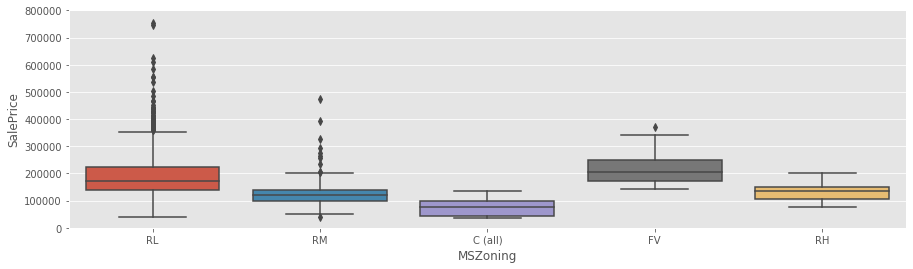

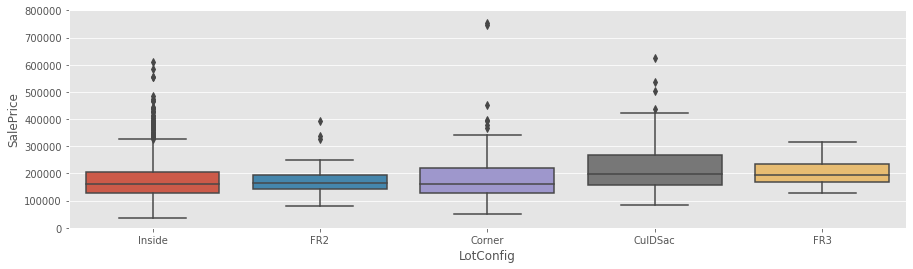

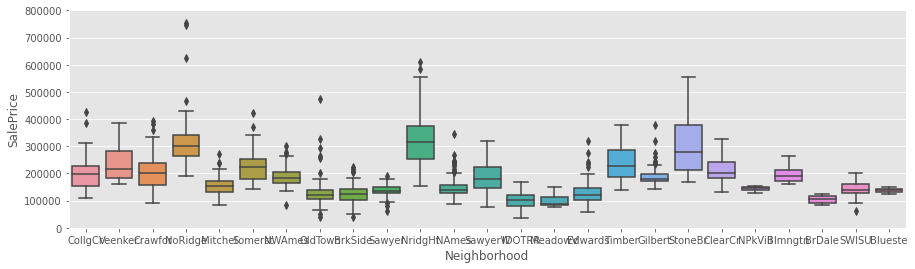

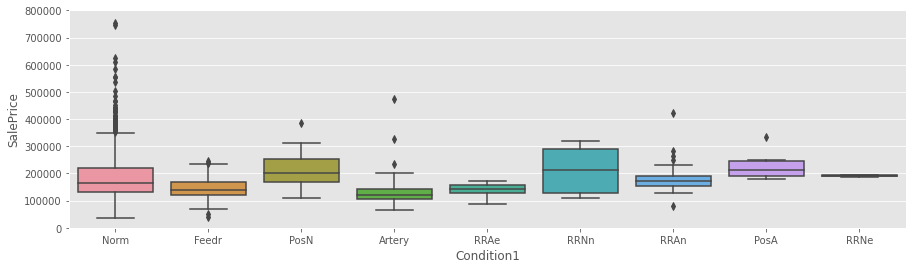

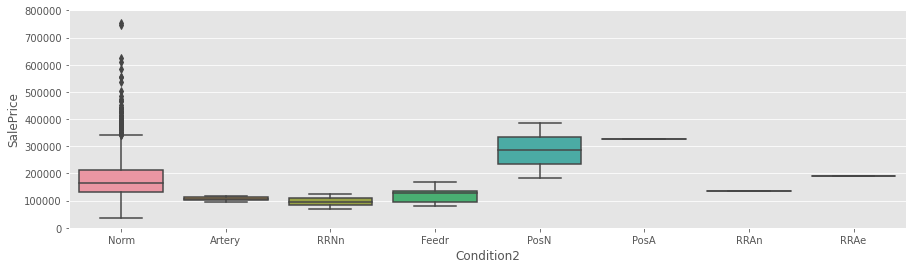

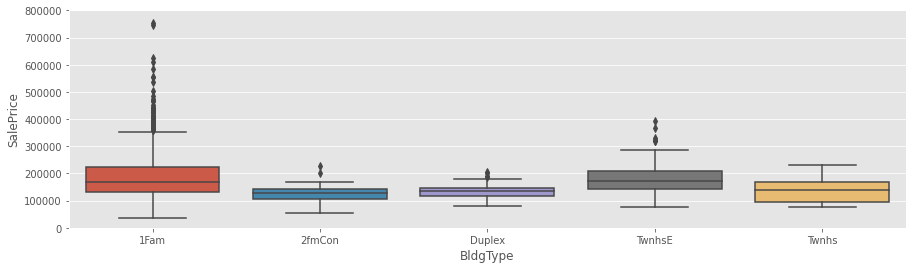

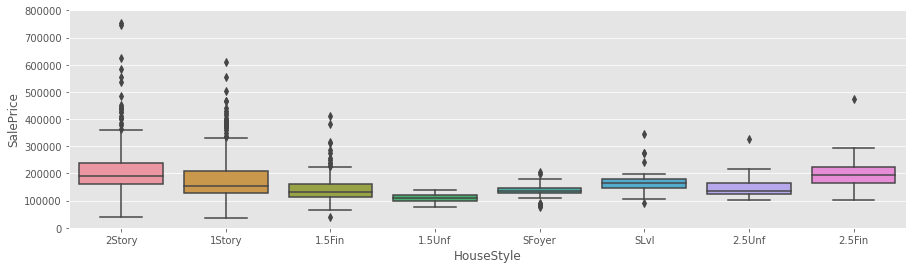

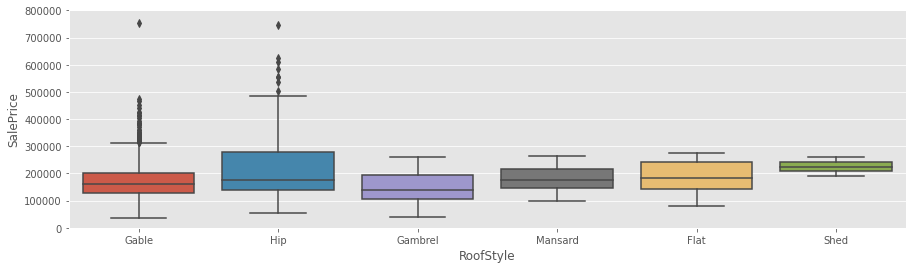

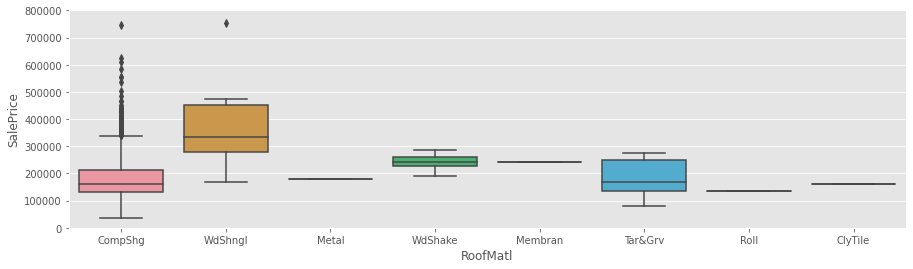

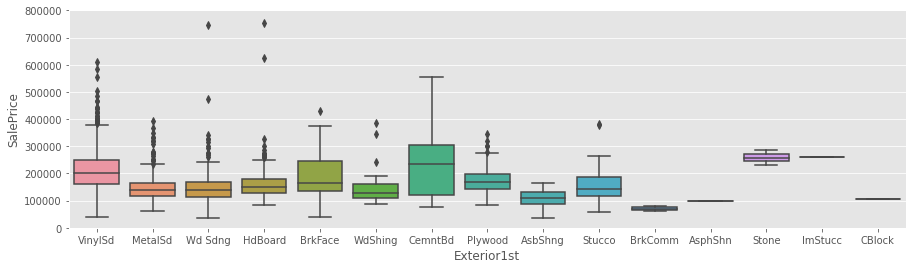

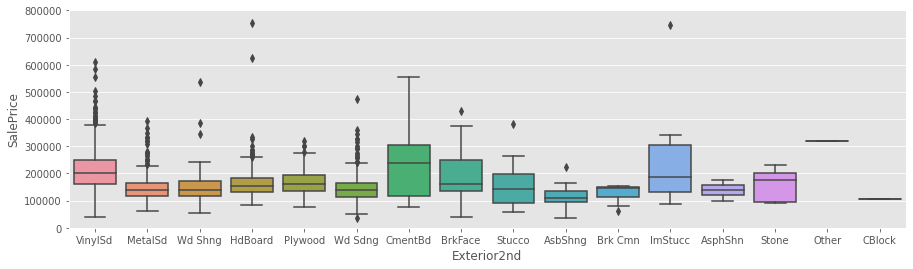

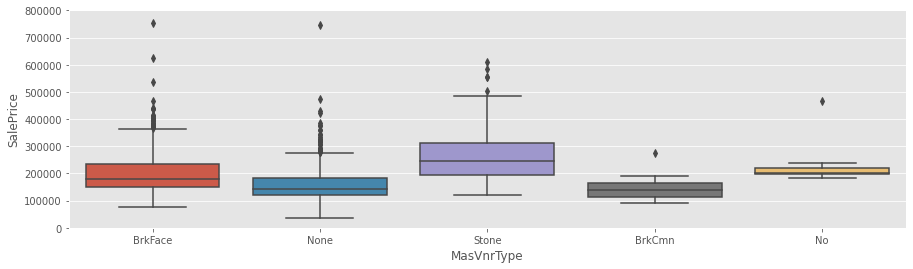

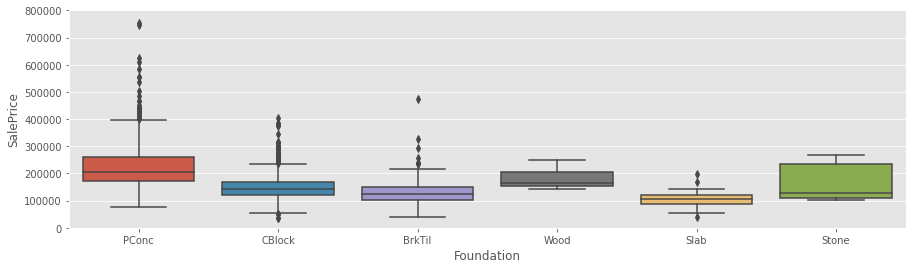

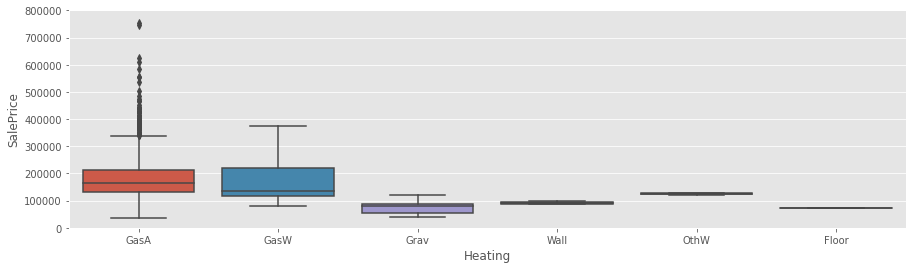

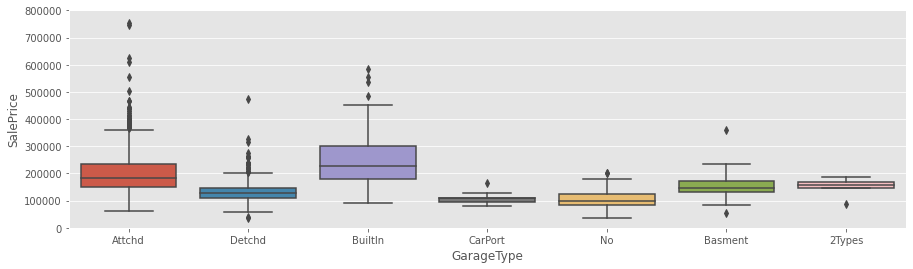

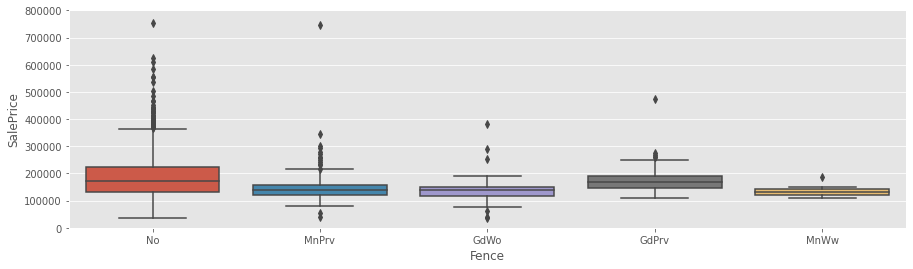

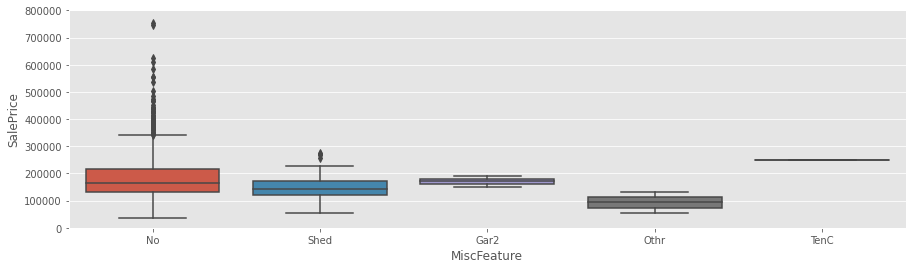

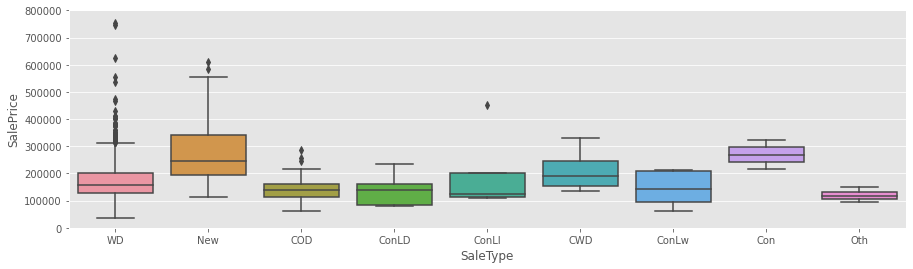

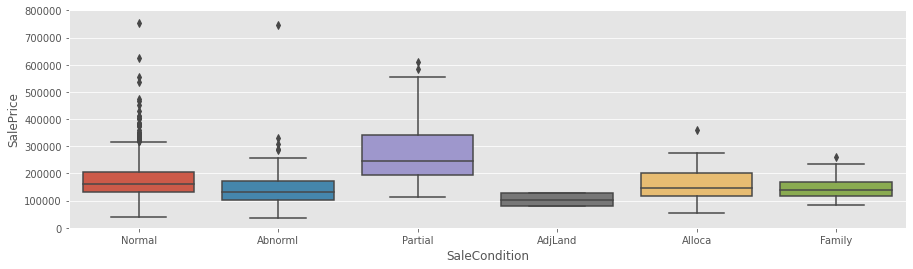

In [14]:
for var in columns_categorical:
    data = pd.concat([X1['SalePrice'],X1[var]], axis=1)
    f, ax =plt.subplots(figsize=(15,4))
    fig = sns.boxplot(x=var, y ='SalePrice', data=data)
    fig.axis(ymin=0, ymax=800000)
    

#### Correlation Matrix

81


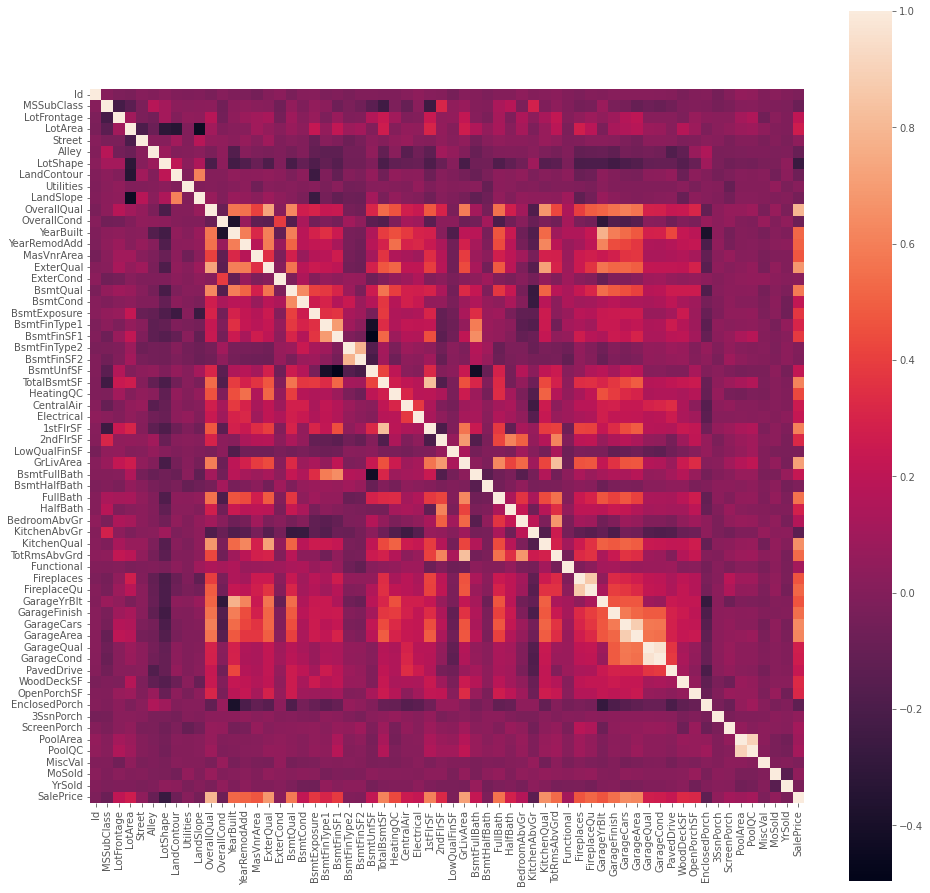

In [15]:
corrmat = X1.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=1, square= True,)
print(X1.columns.size)

#### Zoommed Heatmap

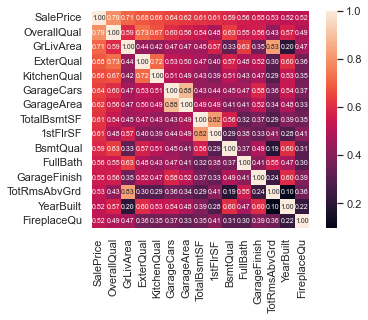

In [16]:
k = 15 # numero di variabili per la heatmap 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(X1[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':7},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Cleaning and Anomaly Value Detections

#### Scatter Plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

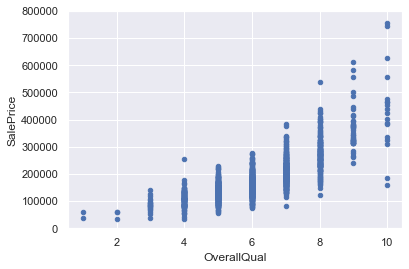

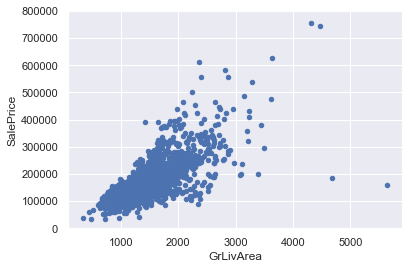

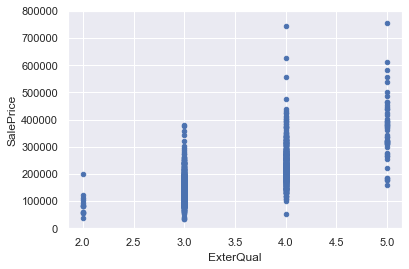

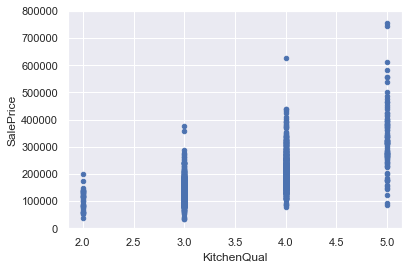

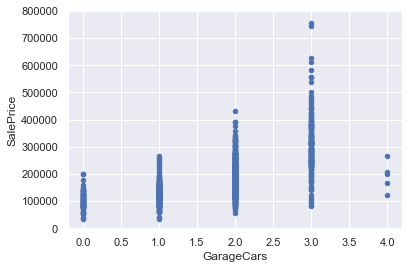

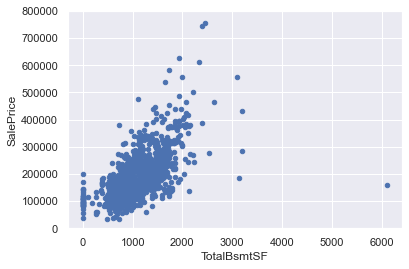

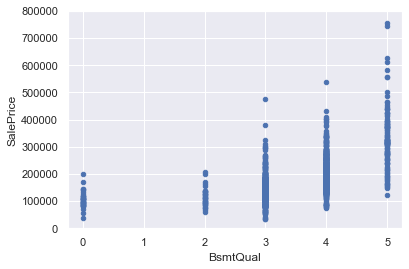

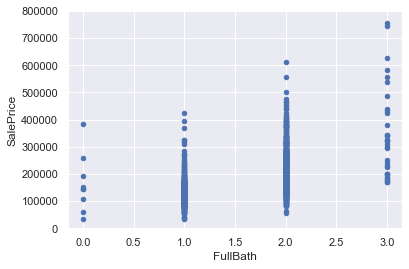

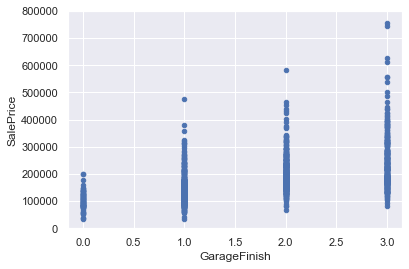

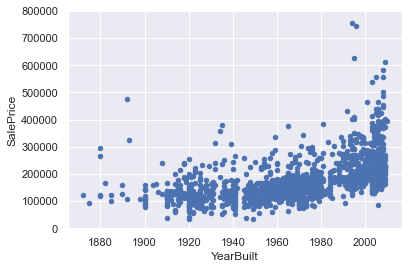

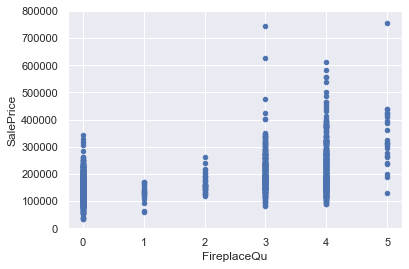

In [17]:
feature_columns = list()
for c in cols:
    if c not in ['SalePrice','TotRmsAbvGrd', 'GarageArea' ,'1stFlrSF']: # sono le features che hanno una correlazione >= a 0.8 con altre features 
        feature_columns.append(c)

    
for var in feature_columns:
    data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
    data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

### Removing anomaly values

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

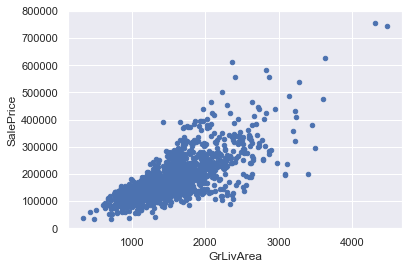

In [18]:

temp =X1[X1['GrLivArea']>4500].index 
temp2 = X1[X1['SalePrice']<200000].index

dropped = temp.intersection(temp2)
for x in dropped :
    X1= X1.drop(x)
 
var = 'GrLivArea'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([457, 769], dtype='int64')


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

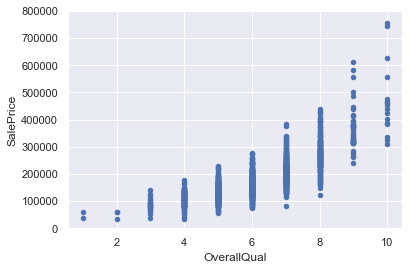

In [19]:
temp =X1[X1['OverallQual']==4].index
temp2 = X1[X1['SalePrice']>200000].index
dropped = temp.intersection(temp2)


temp=(X1[X1['OverallQual']==8].index)
temp2=(X1[X1['SalePrice']>500000].index)
dropped = dropped.union(temp.intersection(temp2))

temp=(X1[X1['OverallQual']==10].index)
temp2=(X1[X1['SalePrice']<200000].index)
dropped = dropped.union(temp.intersection(temp2))
print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'OverallQual'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([1169, 1182], dtype='int64')


<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

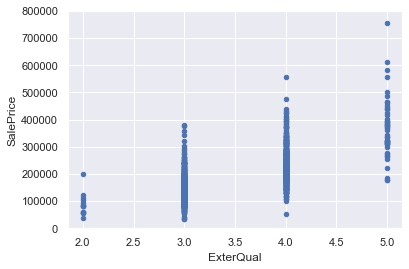

In [20]:
### ExterQual
temp =X1[X1['ExterQual']==4.0].index
temp2 = X1[X1['SalePrice']>600000].index
dropped = temp.intersection(temp2)

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'ExterQual'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([313, 608, 691], dtype='int64')


<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

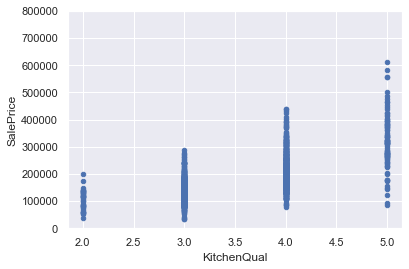

In [21]:
# KitchenQual

temp =X1[X1['KitchenQual']==3.0].index
temp2 = X1[X1['SalePrice']>300000].index
dropped = temp.intersection(temp2)

temp =X1[X1['KitchenQual']==4.0].index
temp2 = X1[X1['SalePrice']>600000].index
dropped= dropped.union(temp.intersection(temp2))

temp =X1[X1['KitchenQual']==5.0].index
temp2 = X1[X1['SalePrice']>700000].index
dropped= dropped.union(temp.intersection(temp2))

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'KitchenQual'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([420, 747, 1190, 1340, 1350], dtype='int64')


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

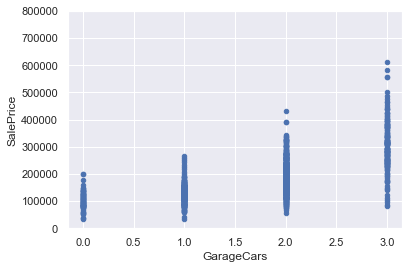

In [22]:
# GarageCars

temp =X1[X1['GarageCars']==4.0].index

dropped = temp


print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'GarageCars'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([], dtype='int64')


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

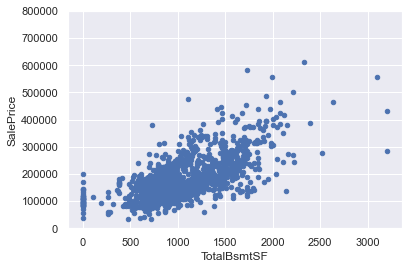

In [23]:
# TotalBsmtSF
temp =X1[X1['TotalBsmtSF']>6000].index

dropped = temp


print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'TotalBsmtSF'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([53], dtype='int64')


<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

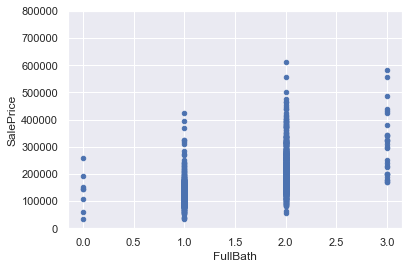

In [24]:
# FullBath

temp =X1[X1['FullBath']==0.0].index
temp2 = X1[X1['SalePrice']>300000].index
dropped = temp.intersection(temp2)


print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'FullBath'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([185, 304, 583], dtype='int64')


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

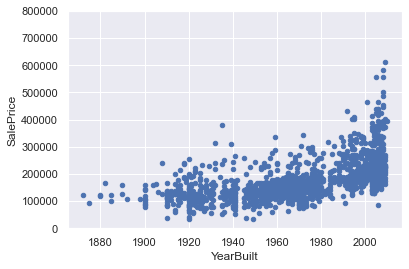

In [25]:
# YearBuilt
temp =X1[X1['YearBuilt']<1900].index
temp2 = X1[X1['SalePrice']>200000].index
dropped = temp.intersection(temp2)

temp =X1[X1['YearBuilt']>1980].index
temp2 = X1[X1['SalePrice']>700000].index
dropped = dropped.union(temp.intersection(temp2))

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'YearBuilt'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([], dtype='int64')


<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

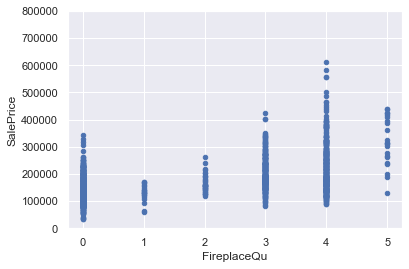

In [26]:
# FireplaceQu

temp =X1[X1['FireplaceQu']==3].index
temp2 = X1[X1['SalePrice']>600000].index
dropped = temp.intersection(temp2)

temp =X1[X1['FireplaceQu']==5].index
temp2 = X1[X1['SalePrice']>700000].index
dropped = dropped.union(temp.intersection(temp2))

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'FireplaceQu'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

#### Normalizzazione delle features rilevanti


##### spiegazione

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


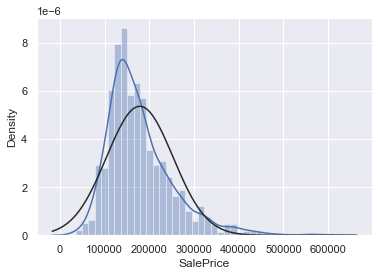

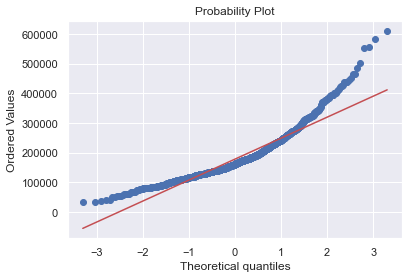

In [27]:
#histogram and normal probability plot
sns.distplot(X1['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(X1['SalePrice'], plot=plt)

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


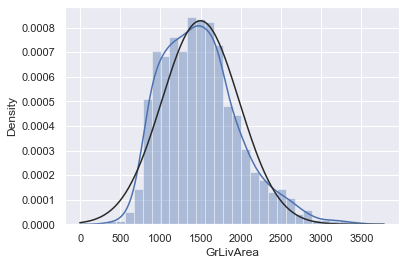

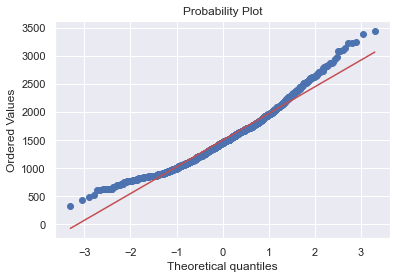

In [28]:
#histogram and normal probability plot
sns.distplot(X1['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(X1['GrLivArea'], plot=plt)

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


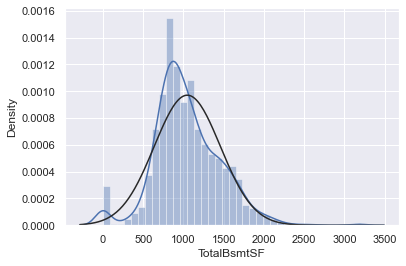

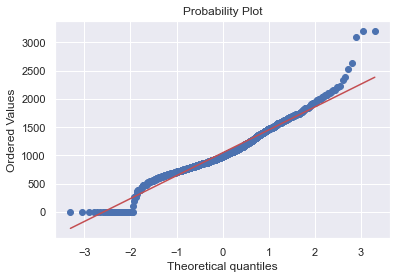

In [29]:
#histogram and normal probability plot
sns.distplot(X1['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(X1['TotalBsmtSF'], plot=plt)

#### normalizzazione delle variabili 

In [30]:
#applying log transformation
X1['SalePrice'] = np.log(X1['SalePrice'])

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


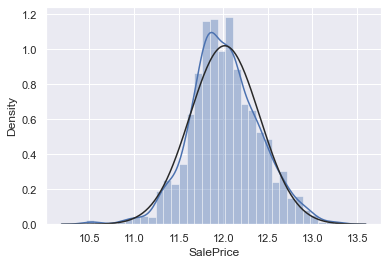

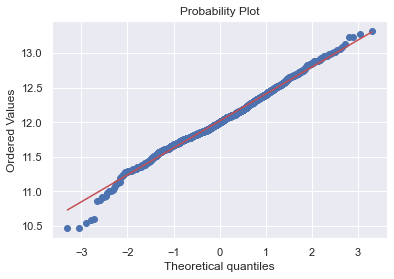

In [31]:
#histogram and normal probability plot (nomalized)
sns.distplot(X1['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1['SalePrice'], plot=plt)

In [32]:
#applying log transformation
X1['GrLivArea'] = np.log(X1['GrLivArea'])
Y1['GrLivArea'] = np.log(Y1['GrLivArea'])

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


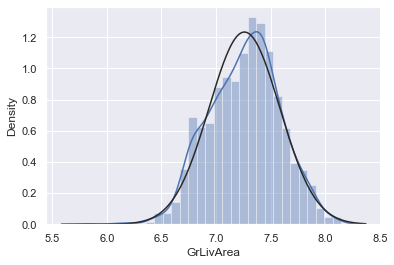

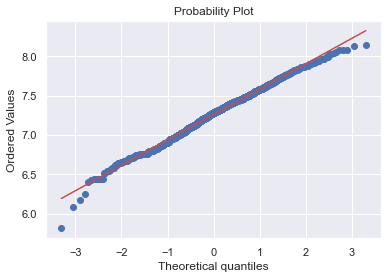

In [33]:
#histogram and normal probability plot (nomalized)
sns.distplot(X1['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1['GrLivArea'], plot=plt)

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


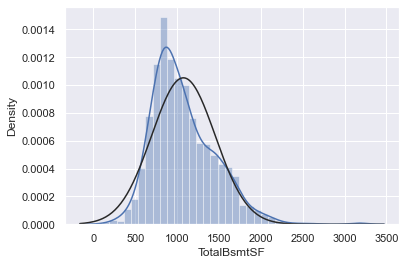

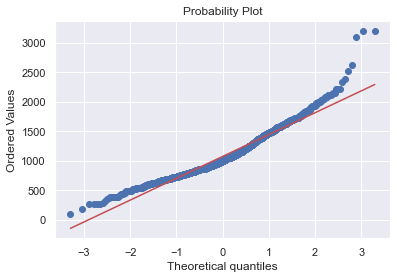

In [34]:
sns.distplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], plot=plt)

In [35]:
X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'])
Y1.loc[Y1['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(Y1.loc[Y1['TotalBsmtSF']>0,'TotalBsmtSF'])

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


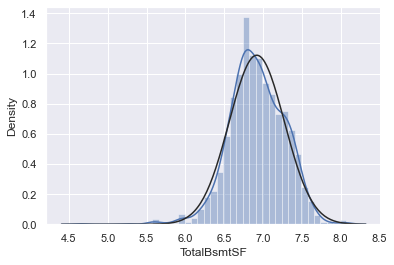

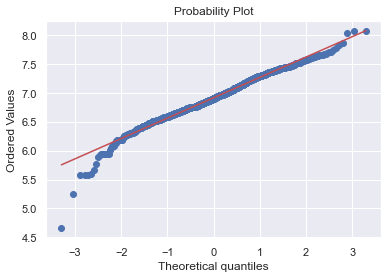

In [36]:
#histogram and normal probability plot (normalized)
sns.distplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], plot=plt)

## Models

In [37]:
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb



c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [38]:
#
def rmse(y_actual, y_predicted):
    rmse= mean_squared_error(y_actual, y_predicted, squared=False)
    return rmse



In [39]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)      
        
cv=10
def rmse_cv(model, sample_x, sample_y):
    rmse_val= np.sqrt(-cross_val_score(model, sample_x, sample_y, scoring = scorer, cv=cv)).mean()
    return rmse_val

#### One hot encoding per variabili categoriche 

In [40]:
#in questa cella vengono trasformate le restanti variabili categoriche attraverso la conversione one hot encoding
delete_columns= columns_categorical.union(['SalePrice'])
columns_numerical = X1.columns.difference(delete_columns)

train_num = X1[columns_numerical]
#Trasformazione logaritmica delle caratteristiche numeriche
# asimmetriche per ridurre l'impatto degli outlier
# Come regola generale, un'asimmetria con un valore assoluto
# > 0,5 è considerata almeno moderatamente asimmetrica
skewness = train_num.apply(lambda x: skew(x))
print(skewness)
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
skewed_features = skewed_features.difference(skewed_features.intersection(feature_columns))
train_num[skewed_features] = np.log1p(train_num[skewed_features])
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
print(skewed_features.intersection(feature_columns))
train_cat = X1[columns_categorical]

train_cat = pd.get_dummies(train_cat)

train = pd.concat([train_num,train_cat], axis=1)

y= X1.SalePrice
X_train, X_val, y_train, y_val = train_test_split(train[feature_columns], y, test_size = 0.3, random_state = 0)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(train, y, test_size = 0.3, random_state = 0)

print("X_train : " + str(X_train.shape))
print("X_val : " + str(X_val.shape))
print("y_train : " + str(y_train.shape))
print("y_val: " + str(y_val.shape))

len(train)
print(y)
print(train)

1stFlrSF         0.887909
2ndFlrSF         0.742641
3SsnPorch       10.228383
Alley            4.288557
BedroomAbvGr     0.217822
                  ...    
Utilities      -37.934163
WoodDeckSF       1.467485
YearBuilt       -0.588278
YearRemodAdd    -0.494525
YrSold           0.092815
Length: 61, dtype: float64


C:\Users\Salvatore Drago\AppData\Local\Temp\ipykernel_4160\398864629.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[skewed_features] = np.log1p(train_num[skewed_features])


46 skewed numerical features to log transform
Index([], dtype='object')
X_train : (1009, 11)
X_val : (433, 11)
y_train : (1009,)
y_val: (433,)
0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1442, dtype: float64
      1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
0     6.753438  6.751101        0.0    0.0             3  1.386294   
1     7.141245  0.000000        0.0    0.0             3  1.386294   
2     6.825460  6.765039        0.0    0.0             3  1.386294   
3     6.869014  6.629363        0.0    0.0             3  1.609438   
4     7.044033  6.960348        0.0    0.0             4  1.386294   
...        ...       ...        ...    ...           ...       ...   
1455  6.860664  6.543912        0.0    0.0             3  1.386294   
1456  7.637234  0.000000        0.0    0.0           

In [41]:
##
def crea_csv_dati():
    a=pd.concat([train,y], axis=1)
    a.to_csv('train_csv.csv')

#### Regressore Lineare senza regolarizzazione

In [42]:
# Linear Regression
lr = LinearRegression()
#Look at predictions on training and validation set
print("RMSE on Training set with cross val:", rmse_cv(lr,X_train,y_train))
print("RMSE on Test set with cross val:", rmse_cv(lr,X_val, y_val))

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
print("RMSE on Training set :", rmse(y_train,y_train_pred))
print("RMSE on Test set :", rmse(y_val,y_val_pred))


RMSE on Training set with cross val: 0.15716773726044497
RMSE on Test set with cross val: 0.15319673476561232
RMSE on Training set : 0.15543992414804741
RMSE on Test set : 0.15501228520614752


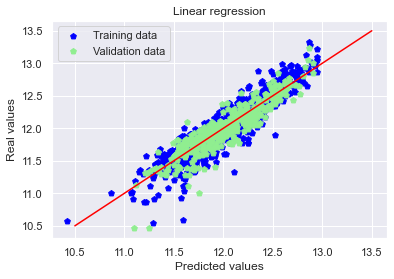

In [43]:
# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "p", label = "Training data")
plt.scatter(y_val_pred, y_val, c = "lightgreen", marker = "p", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

#### Regressori con regolarizzazione 

In [44]:
# Ridge 


ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train_reg, y_train_reg)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4,alpha * 1.45], 
                cv =10)
ridge.fit(X_train_reg, y_train_reg)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set with cross val :", rmse_cv(ridge, X_train_reg,y_train_reg))
print("Ridge RMSE on Test set with corss val :", rmse_cv(ridge, X_val_reg,y_val_reg))
y_train_rdg_pred = ridge.predict(X_train_reg)
y_val_rdg_pred = ridge.predict(X_val_reg)





print("RMSE on Training set :", rmse(y_train_reg,y_train_rdg_pred))
print("RMSE on Test set :", rmse(y_val_reg,y_val_rdg_pred))


Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 5.1
Ridge RMSE on Training set with cross val : 0.11620609688571579
Ridge RMSE on Test set with corss val : 0.12314436249672285
RMSE on Training set : 0.09723543859770674
RMSE on Test set : 0.11552076668326784


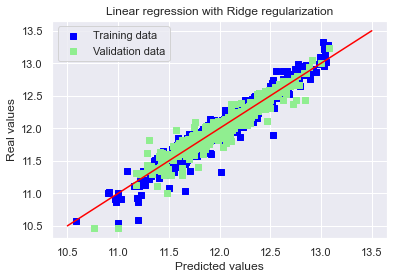

In [45]:
# Plot predictions
plt.scatter(y_train_rdg_pred, y_train_reg, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_rdg_pred, y_val_reg, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()



Ridge picked 211 features and eliminated the other 7 features


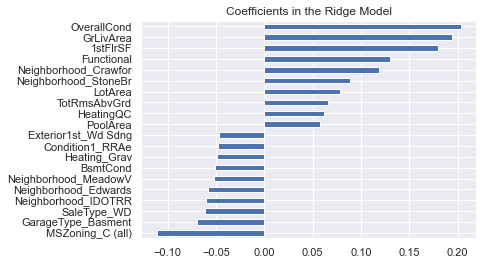

In [46]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train_reg.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [47]:
# Lasso


lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train_reg, y_train_reg)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train_reg, y_train_reg)
alpha = lasso.alpha_
print("Best alpha :", alpha)

y_train_lass_pred = lasso.predict(X_train_reg)
y_val_lass_pred = lasso.predict(X_val_reg)

print("Ridge RMSE on Training set with cross val :", rmse_cv(lasso, X_train_reg,y_train_reg))
print("Ridge RMSE on Test set with corss val :", rmse_cv(lasso, X_val_reg,y_val_reg))



print("RMSE on Training set :", rmse(y_train_reg,y_train_lass_pred))
print("RMSE on Test set :", rmse(y_val_reg,y_val_lass_pred))



Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.0005099999999999999
Ridge RMSE on Training set with cross val : 0.11674911072364251
Ridge RMSE on Test set with corss val : 0.11474339241930687
RMSE on Training set : 0.10151854146761015
RMSE on Test set : 0.10755371427052522


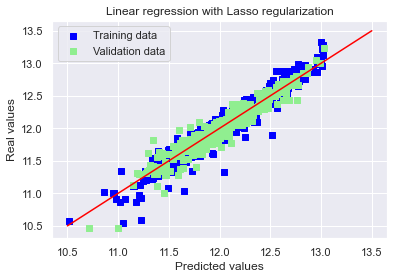

In [48]:
# Plot predictions
plt.scatter(y_train_lass_pred, y_train_reg, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_lass_pred, y_val_reg, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Lasso picked 93 features and eliminated the other 125 features


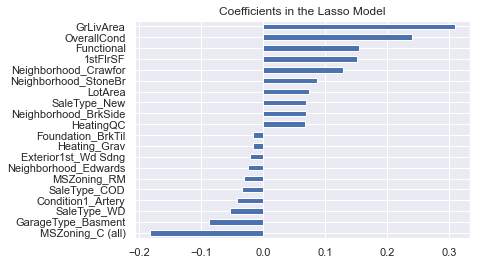

In [49]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train_reg.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [50]:
#ElasticNet

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train_reg, y_train_reg)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train_reg, y_train_reg)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train_reg, y_train_reg)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

y_train_el_pred = elasticNet.predict(X_train_reg)
y_val_el_pred = elasticNet.predict(X_val_reg)

print("Ridge RMSE on Training set with cross val :", rmse_cv(elasticNet, X_train_reg,y_train_reg))
print("Ridge RMSE on Test set with corss val :", rmse_cv(elasticNet, X_val_reg,y_val_reg))



print("RMSE on Training set :", rmse(y_train_reg,y_train_el_pred))
print("RMSE on Test set :", rmse(y_val_reg,y_val_el_pred))

Best l1_ratio : 0.1
Best alpha : 0.003
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.003
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.003
Best l1_ratio : 0.085
Best alpha : 0.00285
Ridge RMSE on Training set with cross val : 0.11681586578813119
Ridge RMSE on Test set with corss val : 0.1179120920994355
RMSE on Training set : 0.09936798082636365
RMSE on Test set : 0.11087241545702334


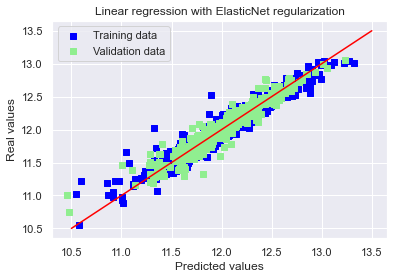

In [51]:
# Plot predictions
plt.scatter(y_train_reg, y_train_el_pred, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_reg, y_val_el_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

ElasticNet picked 132 features and eliminated the other 86 features


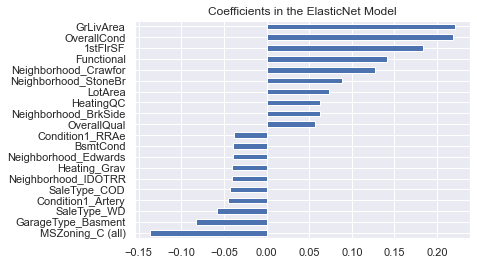

In [52]:
# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train_reg.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [53]:
# Support Vector Regression Linear 

from sklearn.svm import SVR

svr_lin= SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

svr_lin.fit(X_train,y_train)

y_train_svr_pred = svr_lin.predict(X_train)
y_val_svr_pred = svr_lin.predict(X_val)

print("Ridge RMSE on Training set with cross val :", rmse_cv(svr_lin, X_train,y_train))
print("Ridge RMSE on Test set with corss val :", rmse_cv(svr_lin, X_val,y_val))



print("RMSE on Training set :", rmse(y_train,y_train_svr_pred))
print("RMSE on Test set :", rmse(y_val,y_val_svr_pred))


Ridge RMSE on Training set with cross val : 0.20930597777234428
Ridge RMSE on Test set with corss val : 0.22155606105203973
RMSE on Training set : 0.0874221925623319
RMSE on Test set : 0.20243997082734141


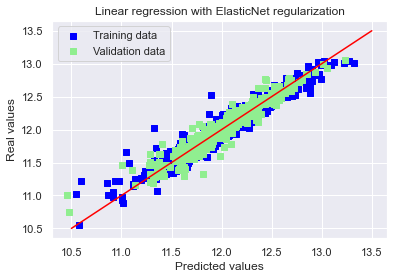

In [54]:
# Plot predictions
plt.scatter(y_train, y_train_el_pred, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val, y_val_el_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<AxesSubplot:>

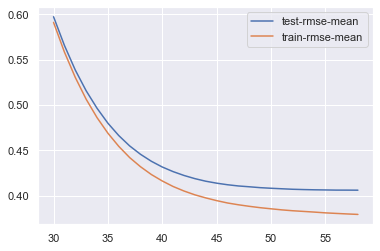

In [55]:
#XGBoost 

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_val)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=1000, early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [56]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

y_train_xgb_pred = model_xgb.predict(X_train)
y_val_xgb_pred = model_xgb.predict(X_val)

print("Ridge RMSE on Training set with cross val :", rmse_cv(model_xgb, X_train,y_train))
print("Ridge RMSE on Test set with corss val :", rmse_cv(model_xgb, X_val,y_val))



print("RMSE on Training set :", rmse(y_train,y_train_xgb_pred))
print("RMSE on Test set :", rmse(y_val,y_val_xgb_pred))

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgb

Ridge RMSE on Training set with cross val : 0.14856826652301205


c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\xgb

Ridge RMSE on Test set with corss val : 0.16143583726649477
RMSE on Training set : 0.11029271615339474
RMSE on Test set : 0.1520148966308546


In [92]:
# FFN

import tensorflow as tf #ts v2
from tensorflow import keras
from tensorflow.keras.layers import Normalization
import os



os.environ["TF_CPP_MIN_LOG_LEVEL"]= "2"

all_features = []
all_targets = []
with open('train_csv.csv') as f:
    for i, line in enumerate(f):
        if i == 0:
            print("HEADER:", line.strip())
            continue  # Skip header
        fields = line.strip().split(",")
        all_features.append([float(v.replace('"', "")) for v in fields[:-1]])
        all_targets.append([float(fields[-1].replace('"', ""))])
        if i == 1:
            print("EXAMPLE FEATURES:", all_features[-1])

features = np.array(all_features, dtype="float32")
targets = np.array(all_targets, dtype="float32")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)


HEADER: Id,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Electrical,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborho

In [93]:
#Normalize the data 
normal = Normalization(axis=-1)
normal.adapt(features)

features_norm=normal(features)

normal = Normalization(axis=-1)
normal.adapt(targets)
targets_norm=normal(targets)

print(features_norm)
print("F var: %.4f" % np.var(features_norm))
print("F mean: %.4f" % np.mean(features_norm))

print(targets_norm)
print("T var: %.4f" % np.var(targets_norm))
print("T mean: %.4f" % np.mean(targets_norm))

tf.Tensor(
[[-1.7302893  -0.79786736  1.1916661  ... -0.11859468  0.4657009
  -0.30537274]
 [-1.7279174   0.4453862  -0.86506957 ... -0.11859468  0.4657009
  -0.30537274]
 [-1.7255454  -0.56697524  1.1959121  ... -0.11859468  0.4657009
  -0.30537274]
 ...
 [ 1.7257128   0.25182575  1.2827635  ... -0.11859468  0.4657009
  -0.30537274]
 [ 1.7280848  -0.05939196 -0.86506957 ... -0.11859468  0.4657009
  -0.30537274]
 [ 1.7304567   0.4301209  -0.86506957 ... -0.11859468  0.4657009
  -0.30537274]], shape=(1442, 219), dtype=float32)
F var: 1.0000
F mean: -0.0000
tf.Tensor(
[[ 0.5916496 ]
 [ 0.23713571]
 [ 0.7692405 ]
 ...
 [ 1.2190529 ]
 [-0.38800037]
 [-0.2931066 ]], shape=(1442, 1), dtype=float32)
T var: 1.0000
T mean: -0.0000


In [94]:
#Prepare a validation set

num_val_samples = int(len(features_norm) * 0.2)
train_features = features_norm[:-num_val_samples]
train_targets = targets_norm[:-num_val_samples]
val_features = features_norm[-num_val_samples:]
val_targets = targets_norm[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 1154
Number of validation samples: 288


In [95]:
#Build a model
model = keras.Sequential(
    [
        keras.layers.Dense(
            512, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(512, activation="relu"),
        #keras.layers.Dropout(0.3),
        #keras.layers.Dense(512, activation="relu"),
        #keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               112640    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 375,809
Trainable params: 375,809
Non-trainable params: 0
_________________________________________________________________


In [96]:
#Train the model 
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.RMSprop(),
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.RootMeanSquaredError()])

model.fit(
    train_features,
    train_targets,
    batch_size=32,
    epochs=40,
    verbose=1,
    validation_data=(val_features, val_targets),
)

Epoch 1/40
37/37 [==============================] - 1s 9ms/step - loss: 0.7116 - accuracy: 0.0000e+00 - root_mean_squared_error: 0.8436 - val_loss: 0.5484 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 0.7405
Epoch 2/40
37/37 [==============================] - 0s 5ms/step - loss: 0.6129 - accuracy: 0.0000e+00 - root_mean_squared_error: 0.7829 - val_loss: 0.5435 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 0.7372
Epoch 3/40
37/37 [==============================] - 0s 6ms/step - loss: 0.6074 - accuracy: 0.0000e+00 - root_mean_squared_error: 0.7793 - val_loss: 0.5440 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 0.7376
Epoch 4/40
37/37 [==============================] - 0s 5ms/step - loss: 0.6045 - accuracy: 0.0000e+00 - root_mean_squared_error: 0.7775 - val_loss: 0.5409 - val_accuracy: 0.0000e+00 - val_root_mean_squared_error: 0.7354
Epoch 5/40
37/37 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.0000e+00 - root_mean_square